<a href="https://colab.research.google.com/github/toshi47/SOM/blob/main/minisom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install minisom
from minisom import MiniSom
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=1035e90e5611f09d7432b02b87477e10b6d46f347eafce75f9d65488a3d9eb2f
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [7]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(type(train_X[0]))
train_X=train_X[:5000]
num=train_y[:5000]
train_X=np.reshape(train_X,(5000,784))
print(train_X.shape)

<class 'numpy.ndarray'>
(5000, 784)


In [8]:
# Initializing neurons and Training
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
data=train_X
data = scale(data)
n_neurons = 50
m_neurons = 50


In [9]:
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

/usr/local/lib/python3.7/dist-packages/minisom.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 12.724153126677262


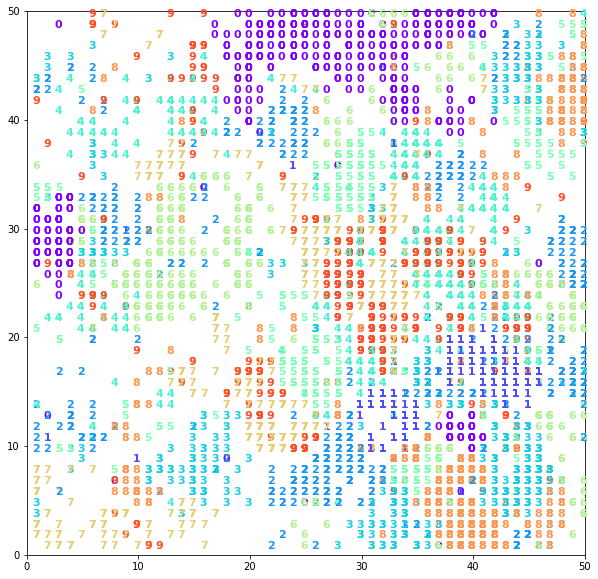

In [10]:
plt.figure(figsize=(10, 10))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
#plt.savefig('resulting_images/som_digts.png')
plt.show()

In [12]:
from sklearn import datasets
# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]
print(data[0])
som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.978922784169333


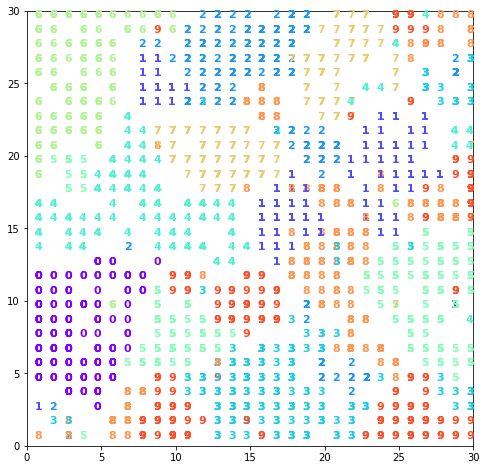

In [28]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

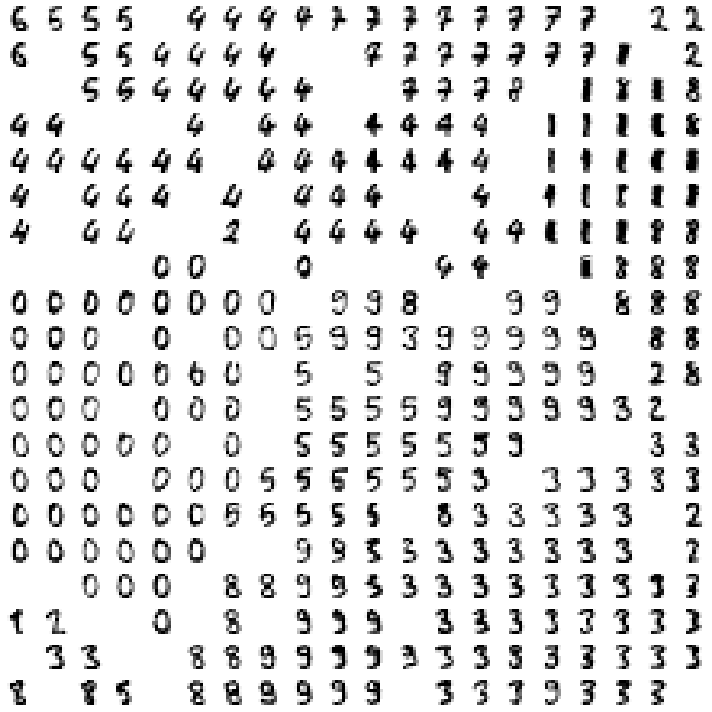

In [29]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.show()